In [4]:
import json
import os

import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import and_

from api import query
from models.Style import Style
from utils.S3Handler import S3Handler

%matplotlib inline

## run new query

In [5]:
# select filters
filters=[Style.gender == "Unisex",
        #Style.articleType == "Watches",
        Style.year >= 2013]

In [6]:
# run query
run_id, items = query.run_query(Style, filters, limit=10, upload_to_s3=True)

0it [00:00, ?it/s]

run_id: 085ecdac-e68b-4ef9-b051-ba5558f6ccad
running query
items count: 10 | query took 0.0013501644134521484 seconds
uploading 10 items to s3


10it [00:04,  2.09it/s]

uploaded all items! | it took 4.788268804550171 seconds
DONE! 085ecdac-e68b-4ef9-b051-ba5558f6ccad | it took 4.851362228393555 seconds


## list query results

In [7]:
s3_handler = S3Handler()

#TODO: update run_id!
results = s3_handler.list_dir(run_id) 


In [8]:
#read data from s3 to pandas dataframe
dfs = []

for obj in results:

    if obj.key.endswith('.json'): #read json files only
        print(obj.key)
        file_body = obj.get()['Body'].read()
        data = json.loads(file_body)
        dfs.append(pd.json_normalize(data))

df = pd.concat(dfs, sort=False)

query_results/085ecdac-e68b-4ef9-b051-ba5558f6ccad/13841.json
query_results/085ecdac-e68b-4ef9-b051-ba5558f6ccad/19918.json
query_results/085ecdac-e68b-4ef9-b051-ba5558f6ccad/19920.json
query_results/085ecdac-e68b-4ef9-b051-ba5558f6ccad/22950.json
query_results/085ecdac-e68b-4ef9-b051-ba5558f6ccad/4716.json
query_results/085ecdac-e68b-4ef9-b051-ba5558f6ccad/51693.json
query_results/085ecdac-e68b-4ef9-b051-ba5558f6ccad/51694.json
query_results/085ecdac-e68b-4ef9-b051-ba5558f6ccad/5253.json
query_results/085ecdac-e68b-4ef9-b051-ba5558f6ccad/5254.json
query_results/085ecdac-e68b-4ef9-b051-ba5558f6ccad/8746.json


In [7]:
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,local_url,s3_url,s3_full_url
0,13841,Unisex,Accessories,Watches,Watches,White,Winter,2016.0,Casual,ADIDAS Unisex Three Small Dials White Watches,/pv/data/fashion-small//images/13841.jpg,query_results/c5133452-14fa-40b3-972d-83da7707...,https://s3-eu-west-1.amazonaws.com/mldp-060620...
0,19918,Unisex,Accessories,Bags,Backpacks,Black,Winter,2015.0,Casual,Wildcraft Unisex Black Backpack,/pv/data/fashion-small//images/19918.jpg,query_results/c5133452-14fa-40b3-972d-83da7707...,https://s3-eu-west-1.amazonaws.com/mldp-060620...
0,19920,Unisex,Accessories,Bags,Backpacks,Black,Winter,2015.0,Casual,Wildcraft Unisex Black Outdoor Backpack,/pv/data/fashion-small//images/19920.jpg,query_results/c5133452-14fa-40b3-972d-83da7707...,https://s3-eu-west-1.amazonaws.com/mldp-060620...
0,22950,Unisex,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Fastrack Unisex Black Dial Watch 9915PP13,/pv/data/fashion-small//images/22950.jpg,query_results/c5133452-14fa-40b3-972d-83da7707...,https://s3-eu-west-1.amazonaws.com/mldp-060620...
0,4716,Unisex,Accessories,Watches,Watches,Black,Winter,2016.0,Sports,ADIDAS Unisex Response ST Analogue Black Watch,/pv/data/fashion-small//images/4716.jpg,query_results/c5133452-14fa-40b3-972d-83da7707...,https://s3-eu-west-1.amazonaws.com/mldp-060620...
0,51693,Unisex,Accessories,Eyewear,Sunglasses,Brown,Winter,2016.0,Casual,Van Heusen Unisex Brown Sunglasses,/pv/data/fashion-small//images/51693.jpg,query_results/c5133452-14fa-40b3-972d-83da7707...,https://s3-eu-west-1.amazonaws.com/mldp-060620...
0,51694,Unisex,Accessories,Eyewear,Sunglasses,Brown,Winter,2016.0,Casual,Van Heusen Unisex Sunglasses VH216-C2,/pv/data/fashion-small//images/51694.jpg,query_results/c5133452-14fa-40b3-972d-83da7707...,https://s3-eu-west-1.amazonaws.com/mldp-060620...
0,5253,Unisex,Accessories,Bags,Duffel Bag,Grey,Winter,2015.0,Casual,Wildcraft Unisex Black & Grey Duffel Bag,/pv/data/fashion-small//images/5253.jpg,query_results/c5133452-14fa-40b3-972d-83da7707...,https://s3-eu-west-1.amazonaws.com/mldp-060620...
0,5254,Unisex,Accessories,Bags,Duffel Bag,Red,Winter,2015.0,Casual,Wildcraft Unisex Red Duffle Bag,/pv/data/fashion-small//images/5254.jpg,query_results/c5133452-14fa-40b3-972d-83da7707...,https://s3-eu-west-1.amazonaws.com/mldp-060620...
0,8746,Unisex,Footwear,Flip Flops,Flip Flops,Navy Blue,Summer,2015.0,Casual,Crocs Kids Navy Blue Clogs,/pv/data/fashion-small//images/8746.jpg,query_results/c5133452-14fa-40b3-972d-83da7707...,https://s3-eu-west-1.amazonaws.com/mldp-060620...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 0
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10 non-null     int64  
 1   gender              10 non-null     object 
 2   masterCategory      10 non-null     object 
 3   subCategory         10 non-null     object 
 4   articleType         10 non-null     object 
 5   baseColour          10 non-null     object 
 6   season              10 non-null     object 
 7   year                10 non-null     float64
 8   usage               10 non-null     object 
 9   productDisplayName  10 non-null     object 
 10  local_url           10 non-null     object 
 11  s3_url              10 non-null     object 
 12  s3_full_url         10 non-null     object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ KB


In [9]:
#check nan values
df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
local_url             0
s3_url                0
s3_full_url           0
dtype: int64

2015.0    5
2016.0    5
Name: year, dtype: int64


<AxesSubplot:ylabel='Frequency'>

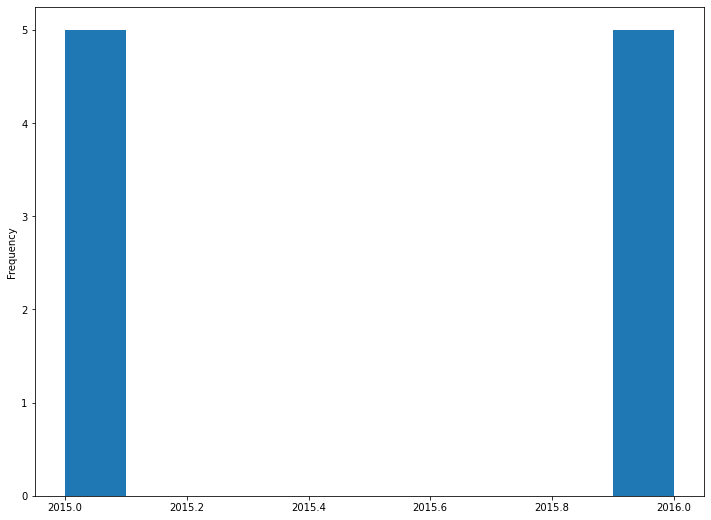

In [10]:
#year distribution
print(df["year"].value_counts())
df["year"].plot(kind='hist', figsize=(12,9))

**********
COLUMN: gender
Unisex    10
Name: gender, dtype: int64


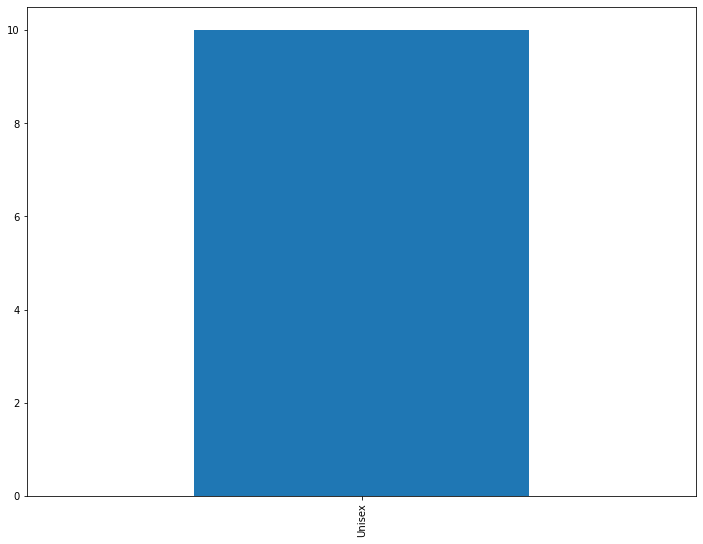

**********
COLUMN: masterCategory
Accessories    9
Footwear       1
Name: masterCategory, dtype: int64


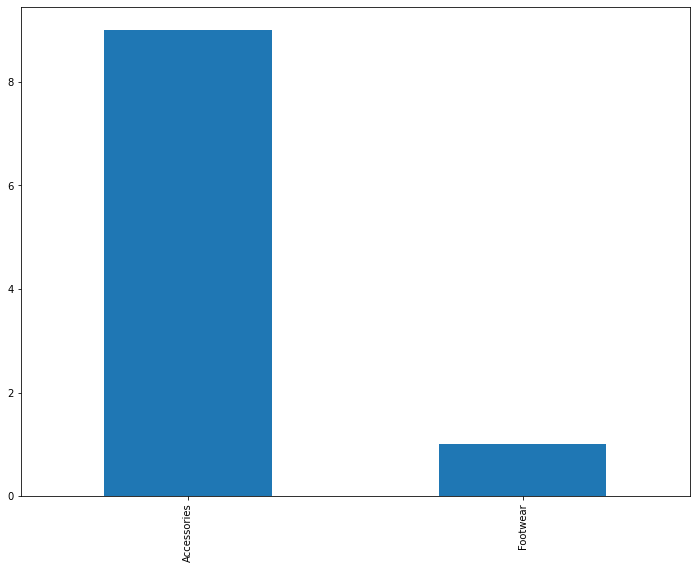

**********
COLUMN: subCategory
Bags          4
Watches       3
Eyewear       2
Flip Flops    1
Name: subCategory, dtype: int64


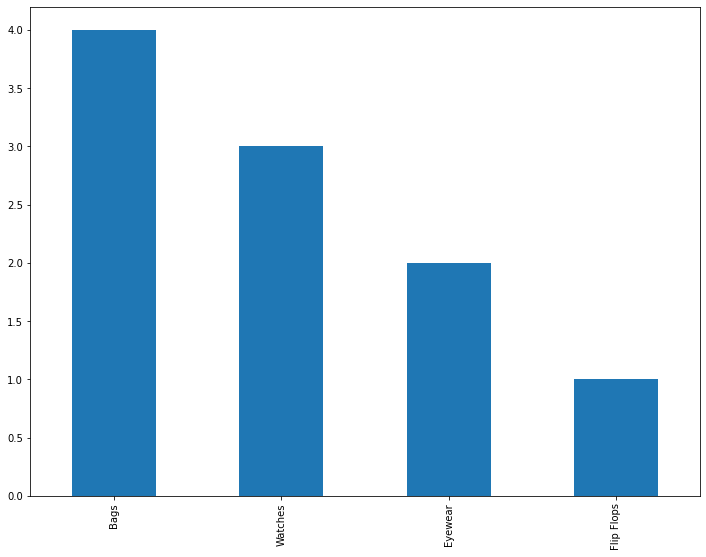

**********
COLUMN: articleType
Watches       3
Sunglasses    2
Duffel Bag    2
Backpacks     2
Flip Flops    1
Name: articleType, dtype: int64


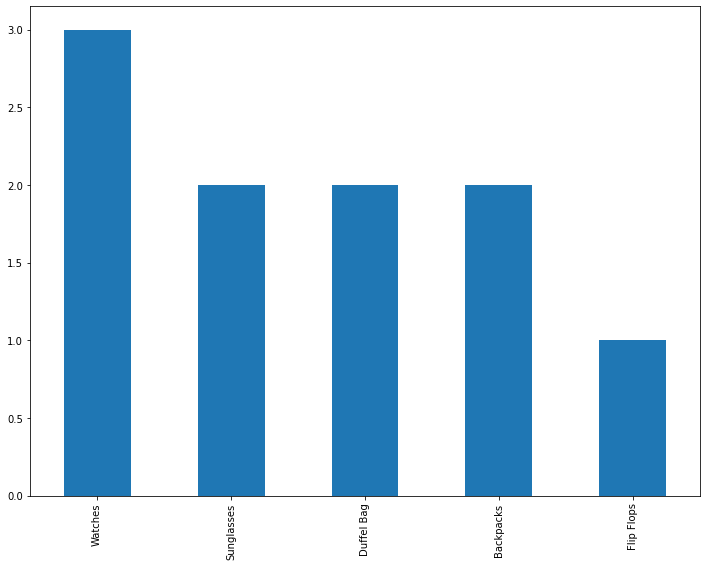

**********
COLUMN: baseColour
Black        4
Brown        2
White        1
Red          1
Grey         1
Navy Blue    1
Name: baseColour, dtype: int64


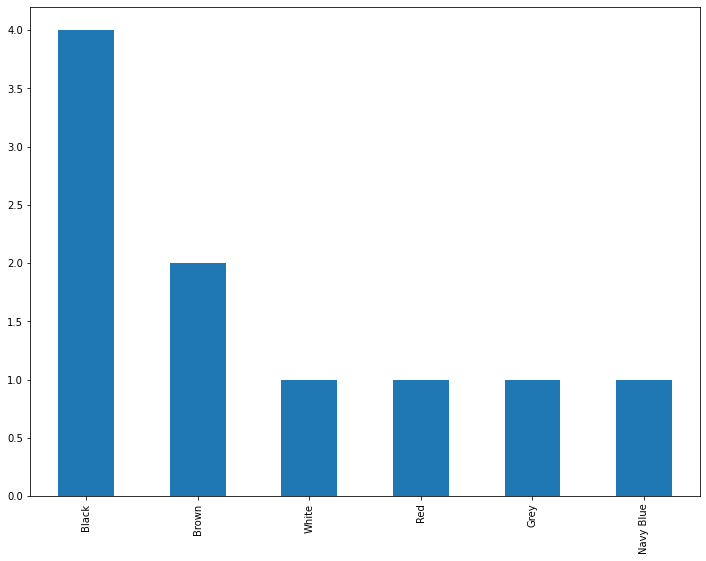

**********
COLUMN: season
Winter    9
Summer    1
Name: season, dtype: int64


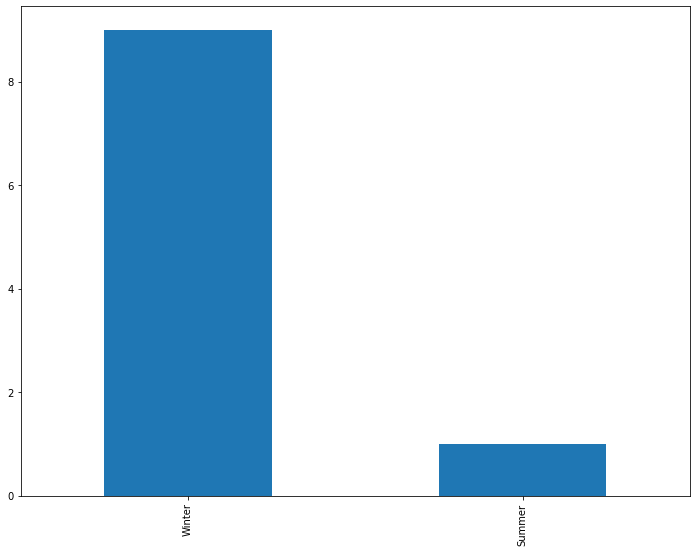

**********
COLUMN: usage
Casual    9
Sports    1
Name: usage, dtype: int64


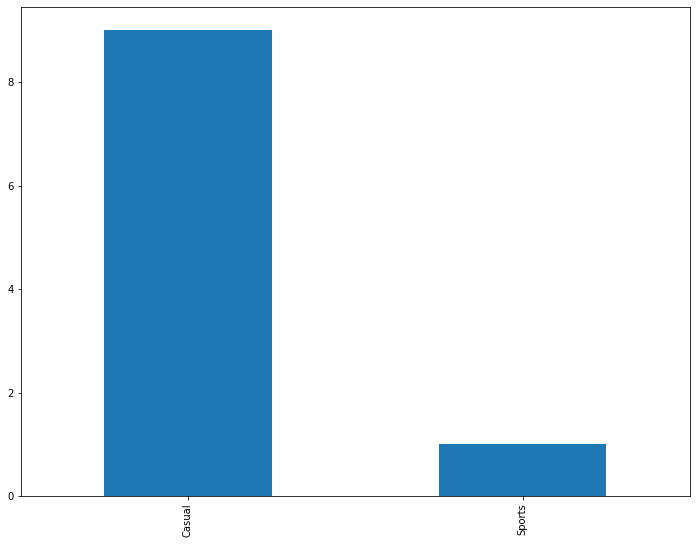

In [11]:
#gender distribution
#all_metadata["gender"].plot(kind='hist', figsize=(12,9))


for col in ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour',
       'season', 'usage']:
    print("*"*10)
    print(f"COLUMN: {col}")
    print(df[col].value_counts())
    df[col].value_counts().plot(kind='bar', figsize=(12,9))
    plt.show()

0 8746


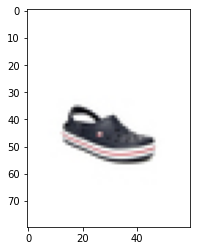

id                                                                 8746
gender                                                           Unisex
masterCategory                                                 Footwear
subCategory                                                  Flip Flops
articleType                                                  Flip Flops
baseColour                                                    Navy Blue
season                                                           Summer
year                                                               2015
usage                                                            Casual
productDisplayName                           Crocs Kids Navy Blue Clogs
local_url                       /pv/data/fashion-small//images/8746.jpg
s3_url                query_results/c5133452-14fa-40b3-972d-83da7707...
s3_full_url           https://s3-eu-west-1.amazonaws.com/mldp-060620...
Name: 0, dtype: object
*********************************
0 51694

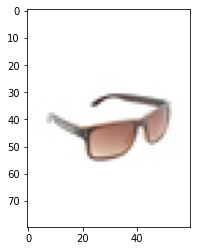

id                                                                51694
gender                                                           Unisex
masterCategory                                              Accessories
subCategory                                                     Eyewear
articleType                                                  Sunglasses
baseColour                                                        Brown
season                                                           Winter
year                                                               2016
usage                                                            Casual
productDisplayName                Van Heusen Unisex Sunglasses VH216-C2
local_url                      /pv/data/fashion-small//images/51694.jpg
s3_url                query_results/c5133452-14fa-40b3-972d-83da7707...
s3_full_url           https://s3-eu-west-1.amazonaws.com/mldp-060620...
Name: 0, dtype: object
*********************************
0 5254


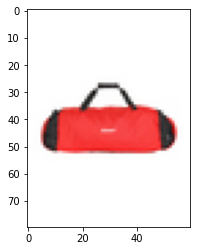

id                                                                 5254
gender                                                           Unisex
masterCategory                                              Accessories
subCategory                                                        Bags
articleType                                                  Duffel Bag
baseColour                                                          Red
season                                                           Winter
year                                                               2015
usage                                                            Casual
productDisplayName                      Wildcraft Unisex Red Duffle Bag
local_url                       /pv/data/fashion-small//images/5254.jpg
s3_url                query_results/c5133452-14fa-40b3-972d-83da7707...
s3_full_url           https://s3-eu-west-1.amazonaws.com/mldp-060620...
Name: 0, dtype: object
*********************************
0 51693

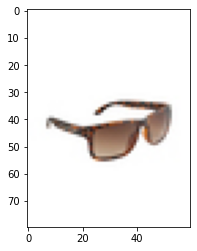

id                                                                51693
gender                                                           Unisex
masterCategory                                              Accessories
subCategory                                                     Eyewear
articleType                                                  Sunglasses
baseColour                                                        Brown
season                                                           Winter
year                                                               2016
usage                                                            Casual
productDisplayName                   Van Heusen Unisex Brown Sunglasses
local_url                      /pv/data/fashion-small//images/51693.jpg
s3_url                query_results/c5133452-14fa-40b3-972d-83da7707...
s3_full_url           https://s3-eu-west-1.amazonaws.com/mldp-060620...
Name: 0, dtype: object
*********************************
0 5253


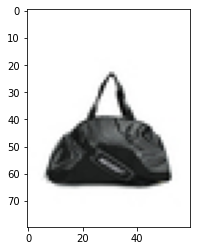

id                                                                 5253
gender                                                           Unisex
masterCategory                                              Accessories
subCategory                                                        Bags
articleType                                                  Duffel Bag
baseColour                                                         Grey
season                                                           Winter
year                                                               2015
usage                                                            Casual
productDisplayName             Wildcraft Unisex Black & Grey Duffel Bag
local_url                       /pv/data/fashion-small//images/5253.jpg
s3_url                query_results/c5133452-14fa-40b3-972d-83da7707...
s3_full_url           https://s3-eu-west-1.amazonaws.com/mldp-060620...
Name: 0, dtype: object
*********************************
0 19920

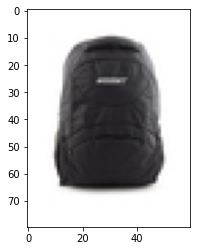

id                                                                19920
gender                                                           Unisex
masterCategory                                              Accessories
subCategory                                                        Bags
articleType                                                   Backpacks
baseColour                                                        Black
season                                                           Winter
year                                                               2015
usage                                                            Casual
productDisplayName              Wildcraft Unisex Black Outdoor Backpack
local_url                      /pv/data/fashion-small//images/19920.jpg
s3_url                query_results/c5133452-14fa-40b3-972d-83da7707...
s3_full_url           https://s3-eu-west-1.amazonaws.com/mldp-060620...
Name: 0, dtype: object
*********************************
0 22950

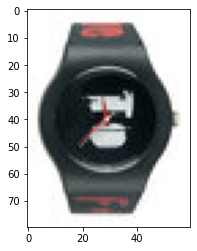

id                                                                22950
gender                                                           Unisex
masterCategory                                              Accessories
subCategory                                                     Watches
articleType                                                     Watches
baseColour                                                        Black
season                                                           Winter
year                                                               2016
usage                                                            Casual
productDisplayName            Fastrack Unisex Black Dial Watch 9915PP13
local_url                      /pv/data/fashion-small//images/22950.jpg
s3_url                query_results/c5133452-14fa-40b3-972d-83da7707...
s3_full_url           https://s3-eu-west-1.amazonaws.com/mldp-060620...
Name: 0, dtype: object
*********************************
0 19918

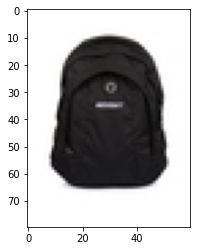

id                                                                19918
gender                                                           Unisex
masterCategory                                              Accessories
subCategory                                                        Bags
articleType                                                   Backpacks
baseColour                                                        Black
season                                                           Winter
year                                                               2015
usage                                                            Casual
productDisplayName                      Wildcraft Unisex Black Backpack
local_url                      /pv/data/fashion-small//images/19918.jpg
s3_url                query_results/c5133452-14fa-40b3-972d-83da7707...
s3_full_url           https://s3-eu-west-1.amazonaws.com/mldp-060620...
Name: 0, dtype: object
*********************************
0 13841

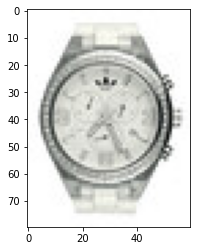

id                                                                13841
gender                                                           Unisex
masterCategory                                              Accessories
subCategory                                                     Watches
articleType                                                     Watches
baseColour                                                        White
season                                                           Winter
year                                                               2016
usage                                                            Casual
productDisplayName        ADIDAS Unisex Three Small Dials White Watches
local_url                      /pv/data/fashion-small//images/13841.jpg
s3_url                query_results/c5133452-14fa-40b3-972d-83da7707...
s3_full_url           https://s3-eu-west-1.amazonaws.com/mldp-060620...
Name: 0, dtype: object
*********************************
0 4716


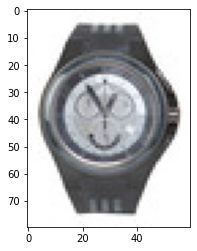

id                                                                 4716
gender                                                           Unisex
masterCategory                                              Accessories
subCategory                                                     Watches
articleType                                                     Watches
baseColour                                                        Black
season                                                           Winter
year                                                               2016
usage                                                            Sports
productDisplayName       ADIDAS Unisex Response ST Analogue Black Watch
local_url                       /pv/data/fashion-small//images/4716.jpg
s3_url                query_results/c5133452-14fa-40b3-972d-83da7707...
s3_full_url           https://s3-eu-west-1.amazonaws.com/mldp-060620...
Name: 0, dtype: object
*********************************


In [13]:
#display random 10 images and print details

for index, row in df.sample(n = 10).iterrows():
    print(index, row['id'])
    plt.imshow(plt.imread(os.path.join(os.environ["PYTHONPATH"], row['local_url'])))
    plt.show()
    print(row)
    print("*"*33)
        

In [23]:
#apply augmentations to images
import cv2
from utils.ImageAugmentation import ImageAugmentation
from config.Config import Config

In [24]:
config = Config()
img_aug = ImageAugmentation()

0 19920


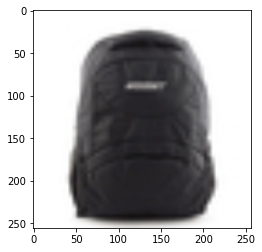

*********************************
0 51694


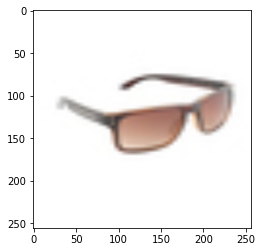

*********************************
0 51693


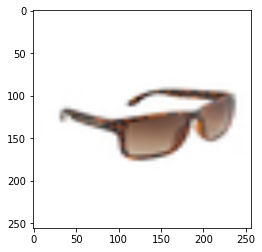

*********************************
0 19918


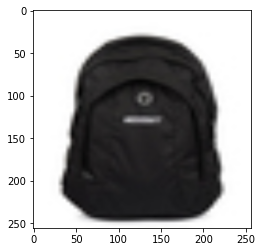

*********************************
0 22950


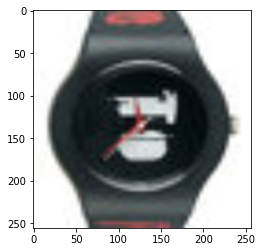

*********************************
0 4716


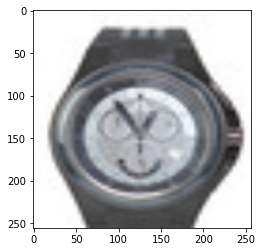

*********************************
0 13841


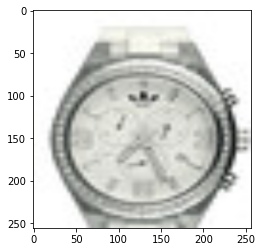

*********************************
0 8746


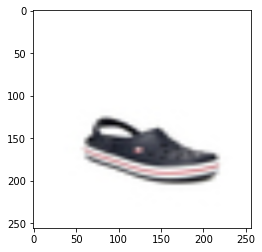

*********************************
0 5253


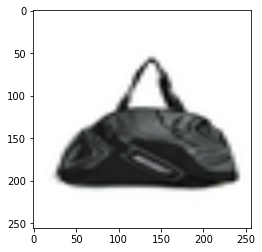

*********************************
0 5254


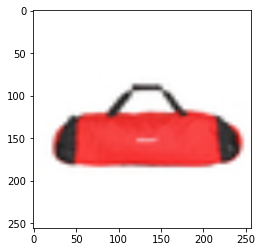

*********************************


In [25]:
#display random 10 images(w. augmentations) and print details

for index, row in df.sample(n = 10).iterrows():
    print(index, row['id'])
    
    image = s3_handler.read_image_from_s3(row['s3_url'])

    transformed_img = img_aug.random_resized_crop(
            image=image,
            width=256, 
            height=256, 
            scale=(0.8, 0.8)
            )
    local_file_path = "{}_aug.jpg".format(os.path.splitext(row['local_url'].split('/')[-1])[0])

    transformed_img_path = os.path.join(config.augmented_images_dir, local_file_path)

    #write image to file    
    plt.imshow(transformed_img) 
    plt.show()
    print("*"*33)
        

## run model on random 10 sample

In [9]:
from utils.ModelInference import ModelInference

In [ ]:
#init model
model = ModelInference()

In [ ]:
#run inference on 10 images and update jsons

#assign none to new columns 
df['fashionnet_category_name'] = None
df['fashionnet_category_type'] = None
df['fashionnet_attribute_name'] = None
df['fashionnet_attribute_type'] = None


for index, row in df.sample(n = 10).iterrows():
    print(index, row['id'])
    image_path = os.path.join(os.environ["PYTHONPATH"], row['file_url'])
    plt.imshow(plt.imread(image_path))
    plt.show()
    out = model.predict(image_path)
    print(out)
    
    df.loc[df.id == row['id'], 'fashionnet_category_name'] = out['category_name']
    df.loc[df.id == row['id'], 'fashionnet_category_type'] = out['category_type']
    df.loc[df.id == row['id'], 'fashionnet_attribute_name'] = out['attribute_name']
    df.loc[df.id == row['id'], 'fashionnet_attribute_type'] = out['attribute_type']
    
    print("*"*33)   



In [27]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,file_url,fashionnet_category_name,fashionnet_category_type,fashionnet_attribute_name,fashionnet_attribute_type
0,13841,Unisex,Accessories,Watches,Watches,White,Winter,2016.0,Casual,ADIDAS Unisex Three Small Dials White Watches,data/fashion-small//images/13841.jpg,Parka,1,gauze maxi,3
0,19918,Unisex,Accessories,Bags,Backpacks,Black,Winter,2015.0,Casual,Wildcraft Unisex Black Backpack,data/fashion-small//images/19918.jpg,Blouse,1,bike,5
0,19920,Unisex,Accessories,Bags,Backpacks,Black,Winter,2015.0,Casual,Wildcraft Unisex Black Outdoor Backpack,data/fashion-small//images/19920.jpg,Blouse,1,lace peplum,4
0,22950,Unisex,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Fastrack Unisex Black Dial Watch 9915PP13,data/fashion-small//images/22950.jpg,Blouse,1,neck ribbed,4
0,4716,Unisex,Accessories,Watches,Watches,Black,Winter,2016.0,Sports,ADIDAS Unisex Response ST Analogue Black Watch,data/fashion-small//images/4716.jpg,Blouse,1,gauze maxi,3
0,51693,Unisex,Accessories,Eyewear,Sunglasses,Brown,Winter,2016.0,Casual,Van Heusen Unisex Brown Sunglasses,data/fashion-small//images/51693.jpg,Coverup,3,neck ribbed,4
0,51694,Unisex,Accessories,Eyewear,Sunglasses,Brown,Winter,2016.0,Casual,Van Heusen Unisex Sunglasses VH216-C2,data/fashion-small//images/51694.jpg,Parka,1,neck ribbed,4
0,5253,Unisex,Accessories,Bags,Duffel Bag,Grey,Winter,2015.0,Casual,Wildcraft Unisex Black & Grey Duffel Bag,data/fashion-small//images/5253.jpg,Blouse,1,gauze maxi,3
0,5254,Unisex,Accessories,Bags,Duffel Bag,Red,Winter,2015.0,Casual,Wildcraft Unisex Red Duffle Bag,data/fashion-small//images/5254.jpg,Blouse,1,neck ribbed,4
0,8746,Unisex,Footwear,Flip Flops,Flip Flops,Navy Blue,Summer,2015.0,Casual,Crocs Kids Navy Blue Clogs,data/fashion-small//images/8746.jpg,Blouse,1,van,5
